# Pymaceuticals Inc.
---

### Analysis

- From the bar chart we could see that Capomulin the biggest mouse number, Zoniferol has the smaller mice number. And amoung the total 248 mouse, 51% of them are male, rest of them are female.
- Based on the caulation, the correlation between mouse weight and average tumor volume is 0.84, which is a positive correlation. It shows that when the mouse weight is increasing, the average tumor volume will also increase.
- From the graph, we could see that Capomulin and Ramicane treatments have a beeter results in reducing tumor size, because they have the similar and the highest effective drug regimen according to the bar and box plots.


 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

#Change the header name
merged_data_df = merged_data_df.rename(columns={'Age_months': 'Age (months)'})

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [27]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
print(total_mice)

249


In [28]:
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Locate all the duplicated mice and return Mouse ID
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()

# Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_data_df = merged_data_df.drop(duplicated_mice_ID_data.index)
analysis_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [30]:
# Checking the number of mice in the clean DataFrame.
no_mice_analysis = len(analysis_data_df['Mouse ID'].unique())
print(no_mice_analysis)

248


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_gp = analysis_data_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = drug_regimen_gp['Tumor Volume (mm3)'].mean()
median = drug_regimen_gp['Tumor Volume (mm3)'].median()
var = drug_regimen_gp['Tumor Volume (mm3)'].var()
std = drug_regimen_gp['Tumor Volume (mm3)'].std()
sem = drug_regimen_gp['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame({'Mean': mean,
                                      'Median': median,
                                      'Variance': var,
                                      'Standard deviation': std,
                                      'SEM': sem})
summary_statistics_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_table = drug_regimen_gp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = summary_table.rename(columns={'mean':'Mean',
                                               'median': 'Median',
                                               'var': 'Variance',
                                               'std': 'Standard deviation',
                                               'sem': 'SEM'})
summary_agg_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
no_mice_per_regimen = drug_regimen_gp['Mouse ID'].count().sort_values(ascending=False)
no_mice_per_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

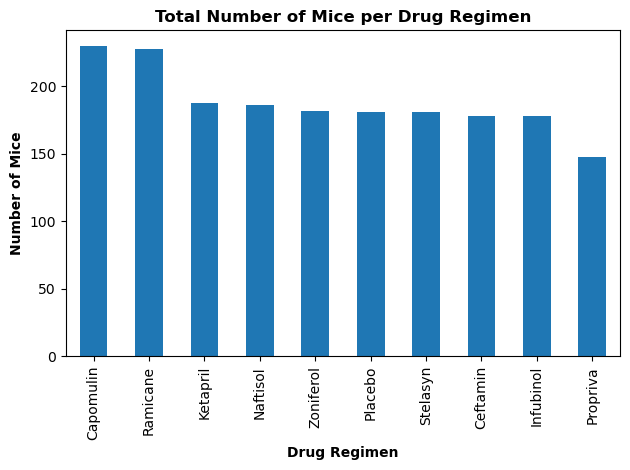

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pd_bar_mice_per_regimen = no_mice_per_regimen.plot(kind='bar', width=0.5)

#Setting X/Y label
pd_bar_mice_per_regimen.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_ylabel('Number of Mice', fontweight = 'bold')

#Saving the bar chart image
plt.tight_layout()
pd_bar_mice_per_regimen.figure.savefig('Images/pd_bar_regimen.png')

plt.show()
plt.close()

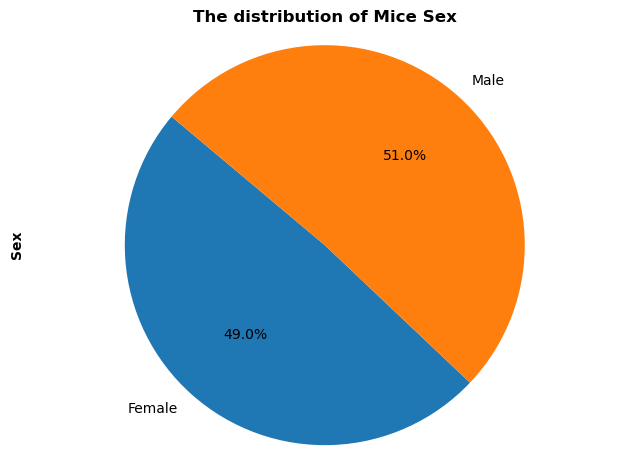

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = analysis_data_df.groupby('Sex')['Sex'].count()

pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.axis("equal")

#Setting X/Y label
pd_pie_mice_sex.set_title(label='The distribution of Mice Sex', fontweight = 'bold')
pd_pie_mice_sex.set_ylabel('Sex', fontweight = 'bold')

# Save pie graph to Images folder
plt.tight_layout()
pd_pie_mice_sex.figure.savefig('Images/pd_pie_mice_sex.png')

plt.show()

plt.close()

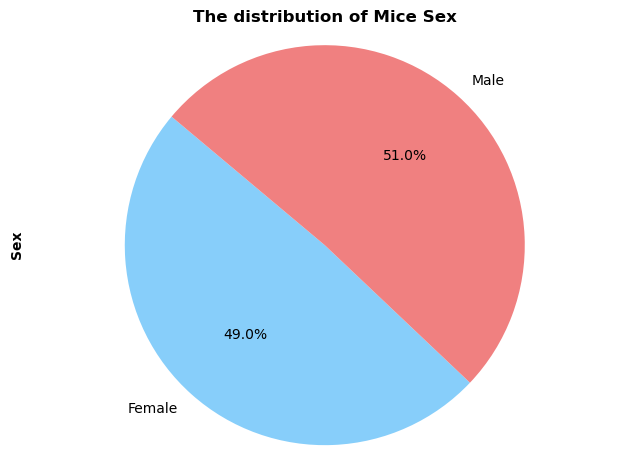

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = sex_mice.index
colors = ['lightskyblue','lightcoral']

py_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=140)

plt.axis("equal")

#Setting X/Y label
plt.title('The distribution of Mice Sex', fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')

# Save an image of pyplot chart
plt.tight_layout()
plt.savefig('Images/py_pie_mice_sex.png')

plt.show()

plt.close()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol = analysis_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]


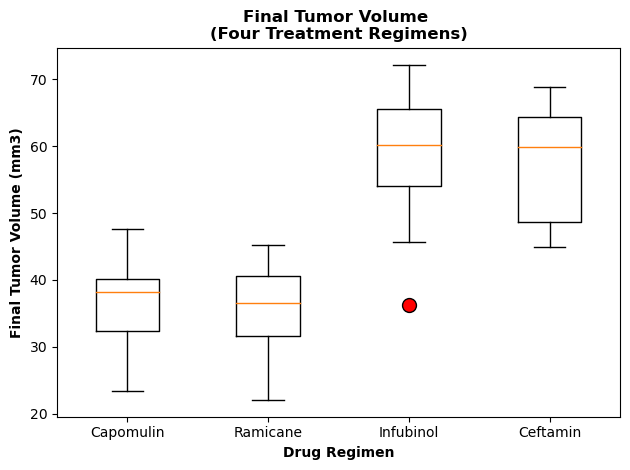

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

#Setting X/Y label
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
final_tumor_plot.figure.savefig('Images/final_tumor_boxplot.png')

plt.show()

plt.close()

## Line and Scatter Plots

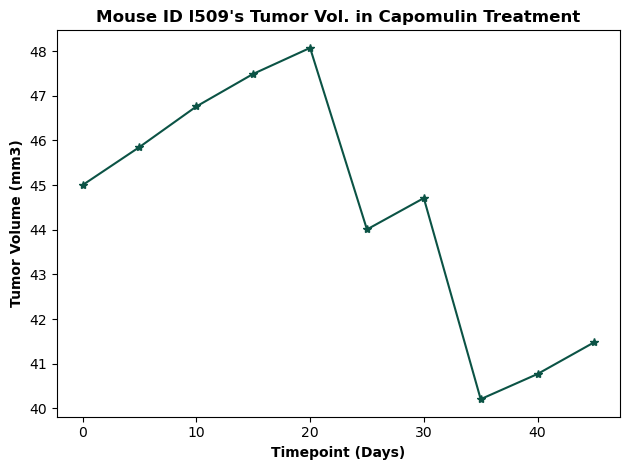

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = analysis_data_df.loc[analysis_data_df['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

#Puting a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')

#Setting X/Y label
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Save line graph to Images folder
plt.tight_layout()
plt.savefig('Images/tumor_plot.png')

plt.show()

plt.close()


C:\Users\MomoZhang_fv6aqre\AppData\Local\Temp\ipykernel_34920\43903878.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()


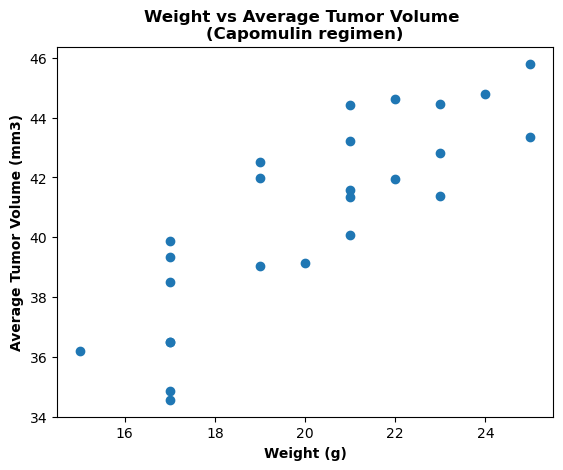

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

#Setting X/Y label
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images/scatter_weight.png')

plt.show()

plt.close()

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84.


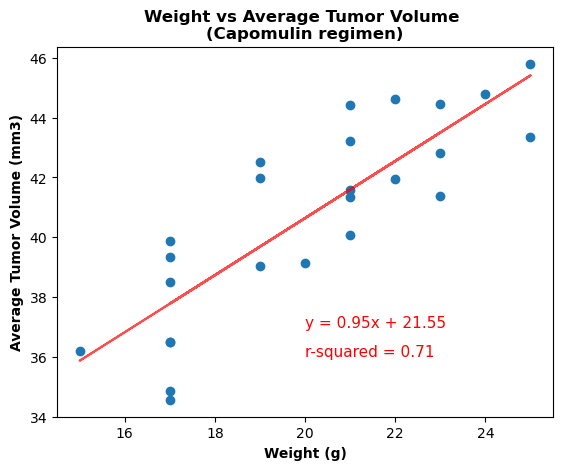

In [43]:
# Calculate the correlation coefficient
x_values = mice_weight_avg
y_values = mice_tumor_avg

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor volume is {correlation}.")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

#Setting X/Y label
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images/scatter_weight_tumor_linear.png')

plt.show()

plt.close()
